## Line Plot

Create a line plot with text labels using `plot()`

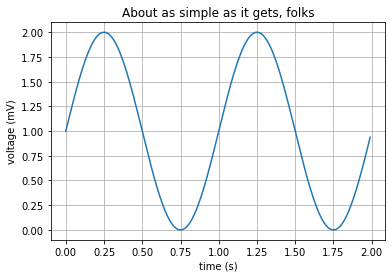

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

#fig.savefig("test.png")
plt.show()

## Multiplots

Multiple axes (i.e. subplots) are created with the `subplot()` function

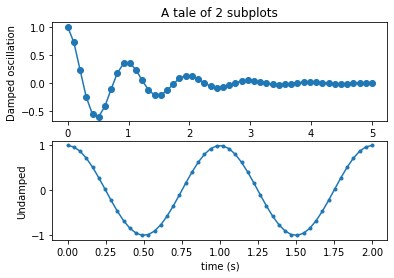

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

## Pseudocolor plot

The `pcolormesh()` function can make a colored representation of a two-dimensional array, even if the horizontal dimensions are unevenly spaced. The `contour()` function is another way to represent the same data:

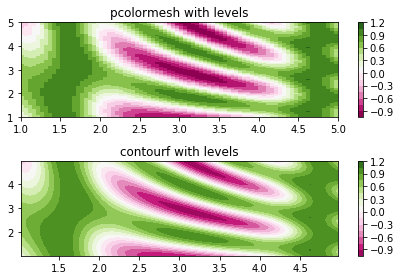

In [6]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np


# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()

## Histogram
 
The `hist()` function automatically generates histograms and returns the bin counts or probabilities

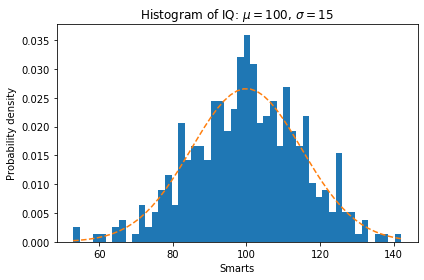

In [7]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

## Streamplot

The `streamplot()` function plots the streamlines of a vector field. In addition to simply plotting the streamlines, it allows you to map the colors and/or line widths of streamlines to a separate parameter, such as the speed or local intensity of the vector field

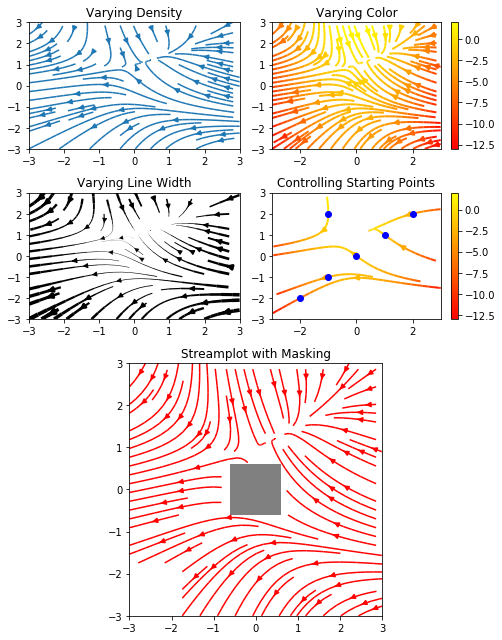

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

fig = plt.figure(figsize=(7, 9))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(X, Y, U, V, density=[0.5, 1])
ax0.set_title('Varying Density')

# Varying color along a streamline
ax1 = fig.add_subplot(gs[0, 1])
strm = ax1.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
ax1.set_title('Varying Color')

#  Varying line width along a streamline
ax2 = fig.add_subplot(gs[1, 0])
lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
ax2.set_title('Varying Line Width')

# Controlling the starting points of the streamlines
seed_points = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1,  0, 1, 2, 2]])

ax3 = fig.add_subplot(gs[1, 1])
strm = ax3.streamplot(X, Y, U, V, color=U, linewidth=2,
                     cmap='autumn', start_points=seed_points.T)
fig.colorbar(strm.lines)
ax3.set_title('Controlling Starting Points')

# Displaying the starting points with blue symbols.
ax3.plot(seed_points[0], seed_points[1], 'bo')
ax3.set(xlim=(-w, w), ylim=(-w, w))

# Create a mask
mask = np.zeros(U.shape, dtype=bool)
mask[40:60, 40:60] = True
U[:20, :20] = np.nan
U = np.ma.array(U, mask=mask)

ax4 = fig.add_subplot(gs[2:, :])
ax4.streamplot(X, Y, U, V, color='r')
ax4.set_title('Streamplot with Masking')

ax4.imshow(~mask, extent=(-w, w, -w, w), alpha=0.5,
          interpolation='nearest', cmap='gray', aspect='auto')
ax4.set_aspect('equal')

plt.tight_layout()
plt.show()

## Log Plot

The `semilogx()`, `semilogy()` and `loglog()` functions simplify the creation of logarithmic plots.

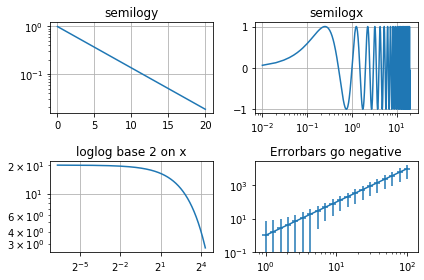

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Data for plotting
t = np.arange(0.01, 20.0, 0.01)

# Create figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# log y axis
ax1.semilogy(t, np.exp(-t / 5.0))
ax1.set(title='semilogy')
ax1.grid()

# log x axis
ax2.semilogx(t, np.sin(2 * np.pi * t))
ax2.set(title='semilogx')
ax2.grid()

# log x and y axis
ax3.loglog(t, 20 * np.exp(-t / 10.0), basex=2)
ax3.set(title='loglog base 2 on x')
ax3.grid()

# With errorbars: clip non-positive values
# Use new data for plotting
x = 10.0**np.linspace(0.0, 2.0, 20)
y = x**2.0

ax4.set_xscale("log", nonposx='clip')
ax4.set_yscale("log", nonposy='clip')
ax4.set(title='Errorbars go negative')
ax4.errorbar(x, y, xerr=0.1 * x, yerr=5.0 + 0.75 * y)
# ylim must be set after errorbar to allow errorbar to autoscale limits
ax4.set_ylim(bottom=0.1)

fig.tight_layout()
plt.show()